## Project title: 
# A Detailed Traffic Analysis For Kabul Region

### Project Brief:

The dataset contains information collected over one month period in Kabul, Afghanistan, by a computer vision model. The model detected four classes of vehicles: cars, bikes, buses, and trucks, and stored them in a CSV file. The dataset also includes additional columns such as time in hours, date, days of the week, and counts for each vehicle type (CarCount, BikeCount, BusCount, TruckCount). The "Total" column represents the total count of all vehicle types detected within a 15-minute duration. Additionally, the dataset includes a column indicating the traffic situation categorized into four classes: 1-Heavy, 2-High, 3-Normal, and 4-Low. 

For this project, an indepth exploratory analysis was carried out on the dataset, and some useful insights which could be used to manage traffic congestions at different times and days of the week for Kabul region were uncovered. These insights could also be useful in transportation planning, congestion management, and traffic flow analysis. It could be used to understand vehicle demand, identify congestion periods, and inform infrastructure improvements (like lane adjustments). Overall, it could empower stakeholders to make data-driven decisions, enhance urban mobility, and create efficient and sustainable cities.


# 1. Load relevant libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2. Load dataset

In [7]:
df = pd.read_csv('Traffic.csv')
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


# 3. Exploratory Data Analysis (EDA)

Dataset Overview

-Number of rows and columns contained in the dataset

In [3]:
df.shape

(2976, 9)

-Dataset info:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


**1. First, we'll explore the distribution of the features in the dataset (both numerical and categorical variables)**

In [8]:
# A dataframe will be created to store the numerical variables (vehicle count) for easy reference and analysis

numerical_features = df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']]

+ **i) Distribution of vehicle count for cars, bikes, buses, and trucks**

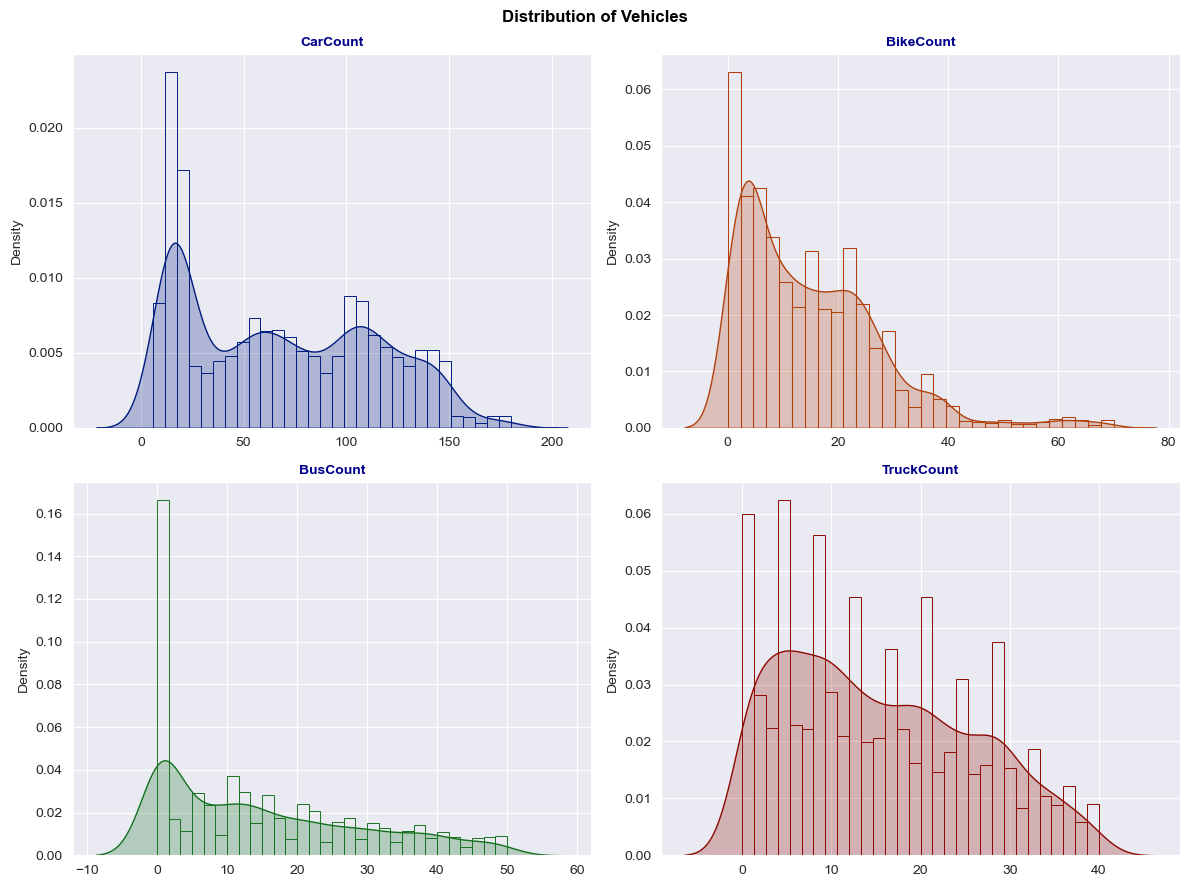

In [6]:
# Generate sub plots using Seaborn
sns.set_style("darkgrid")
colors = sns.color_palette(palette = 'dark', n_colors = len(numerical_features))
fig,axs = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 9))
axs = axs.flat

for i,num_feat in enumerate(numerical_features):
    sns.kdeplot(df, x = num_feat, fill = True, color = colors[i], ax = axs[i])
    sns.histplot(df, x = num_feat,bins = 30, stat = 'density', fill = False, color = colors[i], ax = axs[i])
    axs[i].set_xlabel("")
    axs[i].set_title(num_feat, fontsize = 10, fontweight = 'bold', color = 'darkblue')

fig.suptitle("Distribution of Vehicles", fontsize = 12, fontweight = 'bold', color = 'black')
fig.tight_layout()
fig.show()

+ **ii) Distribution of traffic situations using pie chart**

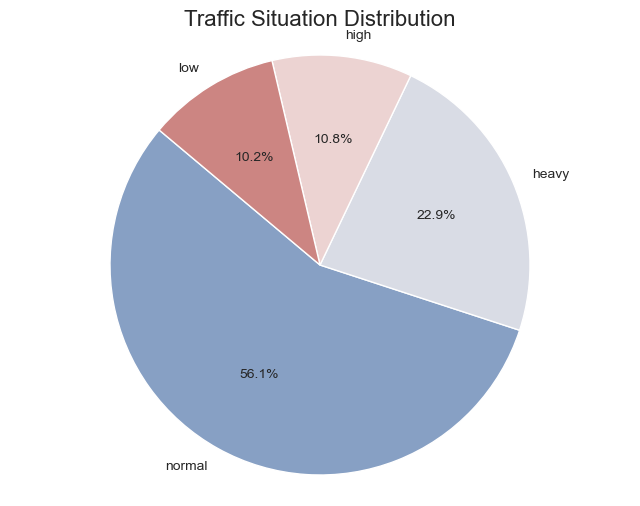

In [7]:
traffic_counts = df['Traffic Situation'].value_counts()
labels = traffic_counts.index
sizes = traffic_counts.values

# Generate pie chart using Seaborn
colors = sns.color_palette("vlag", n_colors=len(labels))
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Traffic Situation Distribution', fontsize=16)
plt.axis('equal')  
plt.show()


The pie chart above revealed that majority of the Traffic situation (56%) within the month was reported as 'normal'; in order words, for more than half of the time within the month, the traffic situation was 'normal'. It also revealed that the secoond highest traffic situation recorded (23%) was 'heavy traffic' (which happens to be the most conjested type of traffic).

**2. A very important question this project aims to answer is: How is traffic congestion distributed as the hours go by per day? In order words, what hours of the day are most busy and less busy?**

+ **i) Busiest hours of the day for traffic**

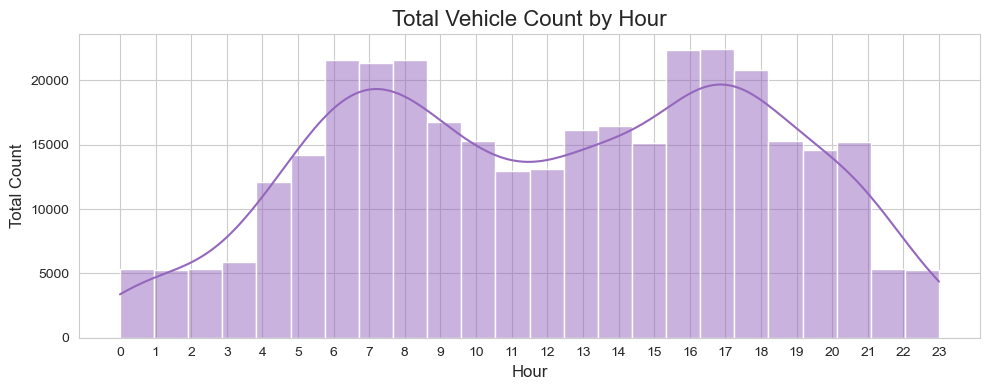

In [8]:
# Convert the 'Time' column to datetime and extract the hour
df['Hour'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p').dt.hour

# Generate histogram plot using Seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='Hour', weights='Total', bins=24, color='#9467bd', kde=True)

plt.title('Total Vehicle Count by Hour', fontsize=16)
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

According to the histogram plot, there appears to be two peak hour range. 
The first occurs in the morning hours between 6am to 8am. This is expected as the highlighted time range corresponds with the first rush hour of the day (6-8am), a period of time when people leave the house for work, or school, or other business of the day. 
The next peak hour range was seen between 4pm to 6pm. This also corresponds to the second rush hour of the day, a period of time when people return home from work, school, and other business of the day.

**Delving deeper into the hourly traffic analysis, it would be nice to understand the distribution of traffic of situations by the hour** 

+ **ii) Distribution of traffic situations by hour**

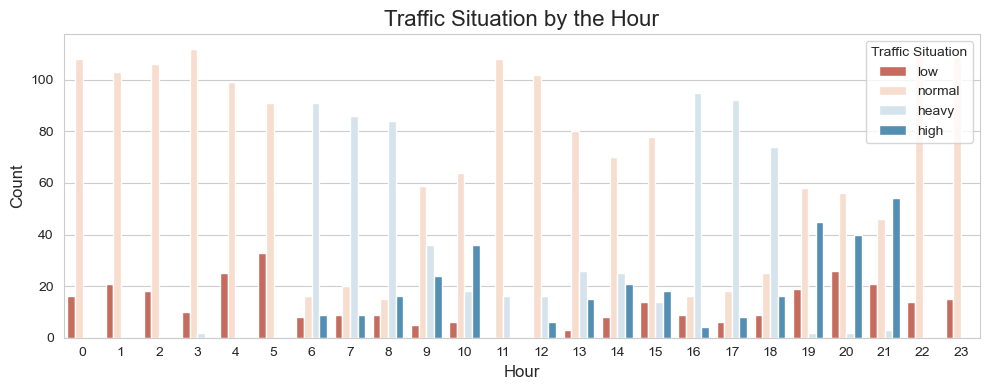

In [9]:
# Convert Hour to object datatype to enable count plot
df['Hour'] = df['Hour'].astype('category')

# Generate count plot using Seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Hour', hue='Traffic Situation', palette='RdBu')
plt.title('Traffic Situation by the Hour', fontsize=16)
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

As seen from the hist plot, the hours of 10pm-5am experiences low or normal congestion (or flow of vehicles). From 6am to 8am, there's a spike in flow of vehicles leading to a heavy traffic/congested situation, owning to the fact that this period is observed to be the first 'rush hour' of the day (as previously analyzed). This traffic congestion gradually reduces afterwards, and a majority of normal traffic is experienced till about 4pm when another rush hour begins. This second rush hour of the day is experienced between 4pm to 6pm, where there happens to be another peak in heavy traffic, and afterwards the traffic situation gradually normalizes/reduces as the hour go by into the night. 

**3. What are the peak hours of traffic for each vehicle type?**

+ **Peak traffic hours for each vehicle type**

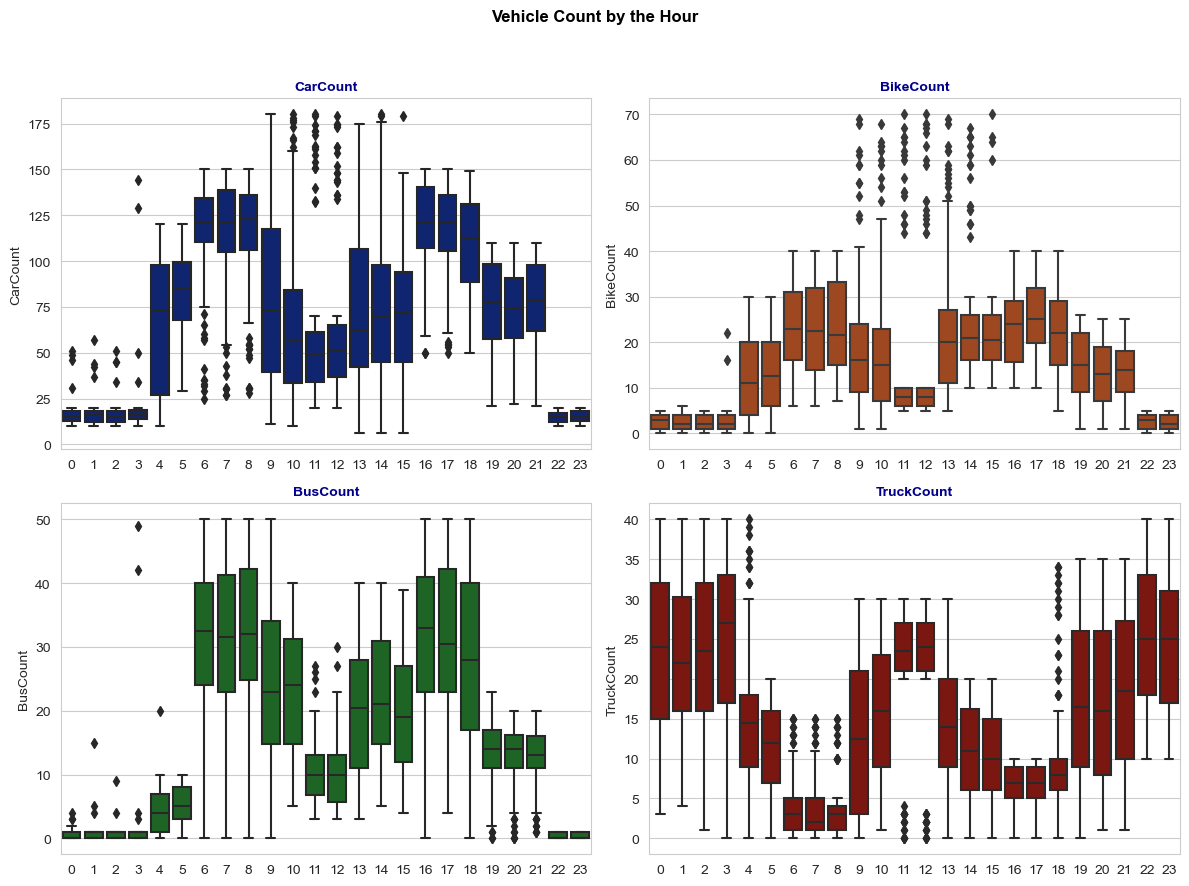

In [10]:
# Convert Hour to object datatype to enable count plot
df['Hour']=df['Hour'].astype('category')

# Generate sub plots using Seaborn
sns.set_style("whitegrid")
colors = sns.color_palette(palette='dark', n_colors=len(numerical_features))
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))
axs = axs.flat

for i, num_feat in enumerate(numerical_features):
    sns.boxplot(data=df, x='Hour', y =num_feat, color=colors[i], ax=axs[i])
    axs[i].set_xlabel("")
    axs[i].set_title(num_feat, fontsize=10, fontweight='bold', color='darkblue')

fig.suptitle('Vehicle Count by the Hour', fontsize = 12, fontweight = 'bold', color = 'black')
fig.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

All vehichle types follow the same peak hour range of 6-8am and 4-6pm, except for trucks which experience its first peak between 10pm-3am, and its second between 9am-1pm. This increase in truck usage at Abdul-Haq Crossroad in Kabul during these two periods ensures that these trucks operate when there are less road users on the road (a period when most persons are asleep and when most persons are at work). It reflects a combination of logistical needs, regulatory considerations, safety concerns, and efforts to optimize delivery efficiency and minimize disruption to daily life of other road users. These patterns are influenced by both local traffic conditions and broader operational strategies. 

Another observation is that there seem to be somewhat of a high bike usage between 9am-2pm, which will be explored along the line.

**4. Next, we'll analyze the daily traffic situation**

We'll start by having a general view of what the total daily traffic daily per day looks like

+ **i) Total vehicle count by day of the week**

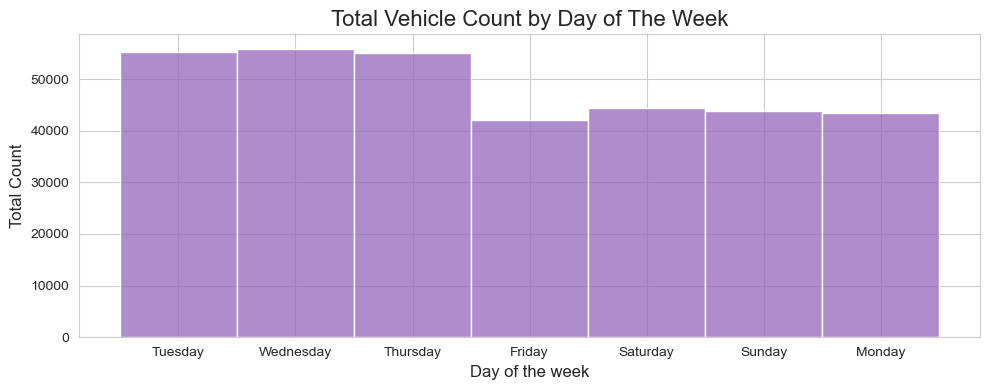

In [11]:
# Generate histogram plot using Seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='Day of the week', weights='Total', color='#9467bd')

plt.title('Total Vehicle Count by Day of The Week', fontsize=16)
plt.xlabel('Day of the week', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.tight_layout()
plt.show()

From the hist plot, the busiest days of the week are Tuesdays, Wednesdays, and Thursdays, while Mondays, and the weekends (Fridays, Saturdays, and Sundays) seem to share a much reduced traffic count. We understand that there are no much official work and school activities going on over the weekend, hence the reduced traffic, but Monday (which happens to be the official start of the week) having same amount of reduced traffic as the weekend, has to be further investigated.  

+ **ii) Vehicle count variation by days of the week**

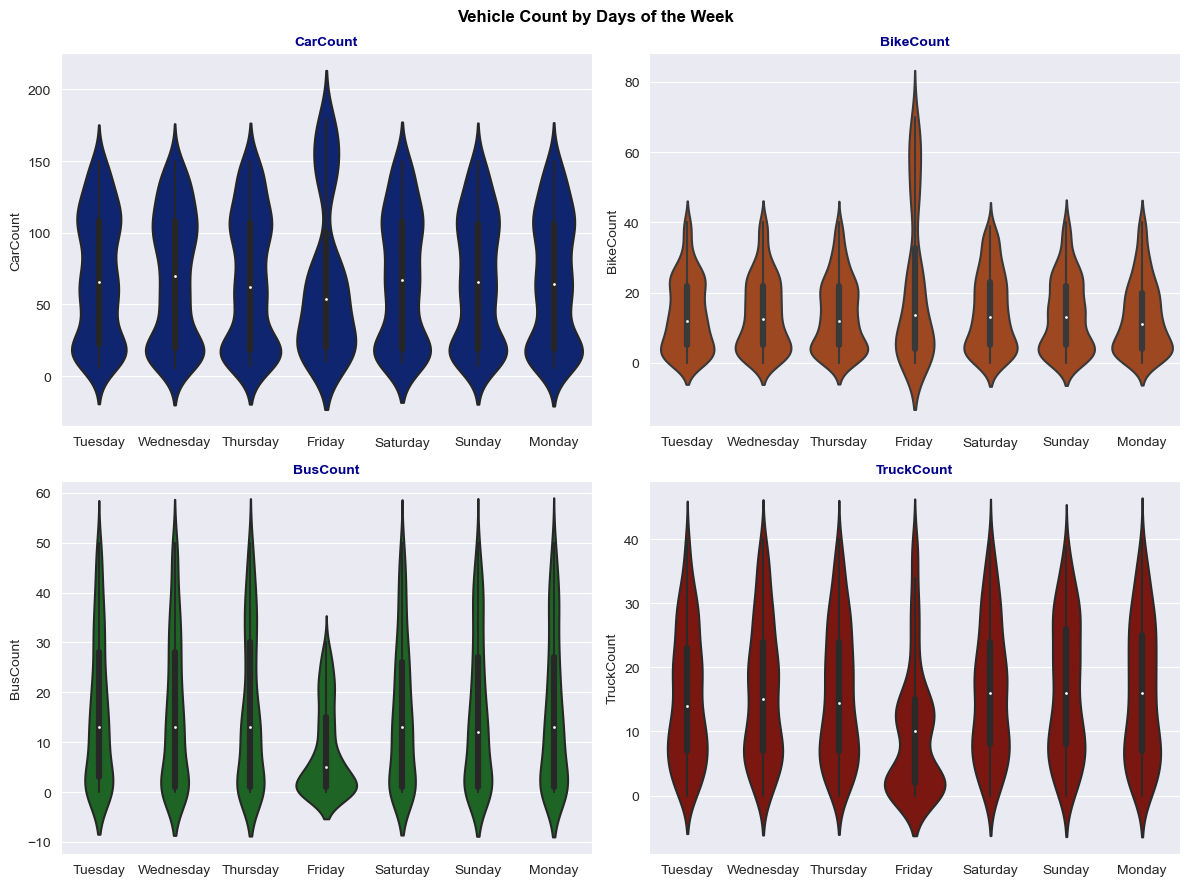

In [12]:
# Generate violin plots using Seaborn
sns.set_style("darkgrid")
colors = sns.color_palette(palette = 'dark', n_colors = len(numerical_features))
fig,axs = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 9))
axs = axs.flat

for i,num_feat in enumerate(numerical_features):
    sns.violinplot(df, x = df['Day of the week'], y = num_feat, bins = 30, stat = 'density', fill = False, color = colors[i], ax = axs[i])
    axs[i].set_xlabel("")
    axs[i].set_title(num_feat, fontsize = 10, fontweight = 'bold', color = 'darkblue')

fig.suptitle('Vehicle Count by Days of the Week', fontsize = 12, fontweight = 'bold', color = 'black')
fig.tight_layout()
fig.show()

One obvious observation from the violin plot is one that occurs on Fridays, where there is an increase in bike usage, cars also experience a little increase too in usage, but buses and trucks experience a reduction in usage. 

**Let's go a bit further to analyze the traffic situation for the days of the week**

+ **iii) Traffic situation for the Days of the week**

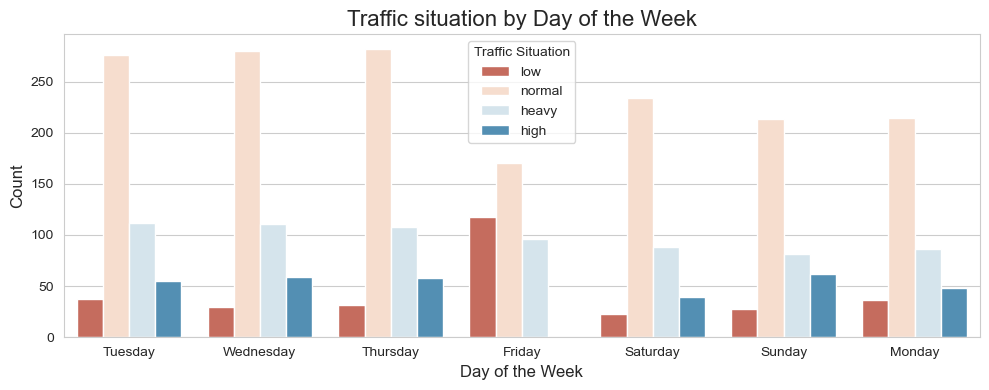

In [13]:
# Generate count plot using Seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Day of the week', hue='Traffic Situation', palette='RdBu')
plt.title('Traffic situation by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

The chart above describes Tuesdays, Wednesdays, and Thursdays as days with the most traffic (in line with the previous hist plot), having majority of normal traffic count, followed by heavy and high traffic flow. Fridays, Saturdays, Sundays, and Mondays expereience a bit less traffic as compared to the other days, with Fridays having the most low traffic count.  We do understand the expected increase in traffic flow on week days due to work and school activities, but the chart also reaveals that there is a bit of traffic volume over the weekends, and that Friday seems to experience somewhat more heavy traffic compared to the other days of the weekend; we'll try to further explore why that's the case.

**5. Weekdays and Weekends Analysis**

**First we'll subset the entire dataset to weekday and weekend data, to have a closer view of the traffic situation**

Let's begin with the first insight of Monday having fewer traffic count than other weekdays 

In [14]:
# Creating a dataframe having just weekdays

monday = df['Day of the week']=='Monday'
tuesday = df['Day of the week']=='Tuesday'
wednesday = df['Day of the week']=='Wednesday'
thursday = df['Day of the week']=='Thursday'
weekday = df[monday|tuesday|wednesday|thursday]
weekday.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Hour
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low,0
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low,0
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low,0
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low,0
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal,1


+ **i) Total traffic count for weekdays**

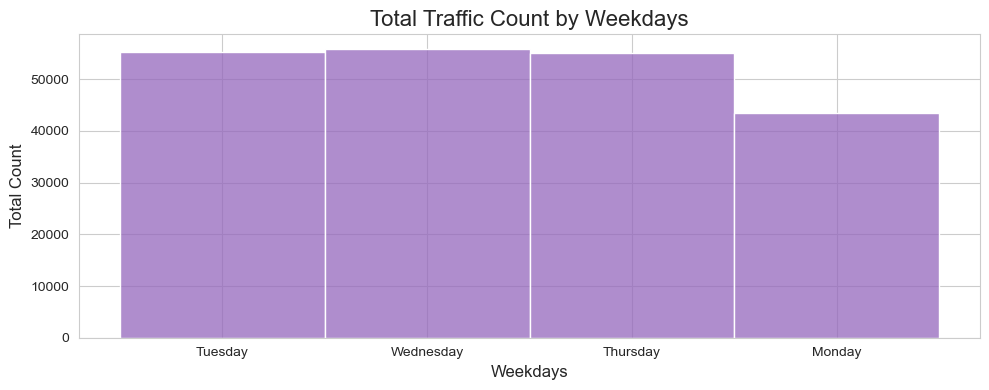

In [15]:
# Generate histogram plot using Seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(10, 4))
sns.histplot(data=weekday, x='Day of the week', weights='Total', color='#9467bd')

plt.title('Total Traffic Count by Weekdays', fontsize=16)
plt.xlabel('Weekdays', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.tight_layout()
plt.show()

In [16]:
# Select columns of interest for vehicle analysis
selected_columns1 = weekday[['Day of the week', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount']]

# Grouping by 'Category' and summing the selected columns
weekdaysum = selected_columns1.groupby('Day of the week').sum().reset_index()

weekdaysum

,Day of the week,CarCount,BikeCount,BusCount,TruckCount
0,Monday,25893,5064,6206,6213
1,Thursday,32704,6633,8027,7626
2,Tuesday,33426,6627,7816,7446
3,Wednesday,33424,6704,7943,7783


As seen in the dataframe and hist plot above, Monday experiences a drastic drop across all vehicle usage, which I think could be due to the following reasons:

1. **Post-Weekend Slowdown:** 
Mondays often have a different traffic pattern compared to other weekdays. After the weekend, many people may start their day later than usual, resulting in lighter traffic during the early part of the day. Some businesses and schools may open later on Mondays, or people may need additional time to adjust back to the workweek routine.

2. **Traffic Patterns and Congestion:** 
Mondays may see a different pattern of traffic flow as people settle back into their weekday routines. The decrease could also reflect people choosing to work from home, particularly if remote working is an option or if there are specific reasons (like weather or security concerns) that make people less likely to travel.

3. **Lower Number of Public Events and Activities:** 
Mondays typically have fewer public events, social gatherings, or community activities compared to weekends or other weekdays, which could contribute to decreased traffic levels in certain areas.

Next, we'll explore the weekends 

In [17]:
# Creating a dataframe having just weekends

friday = df['Day of the week']=='Friday'
saturday = df['Day of the week']=='Saturday'
sunday = df['Day of the week']=='Sunday'
weekend = df[friday|saturday|sunday]

+ **ii) Total situation for weekends**

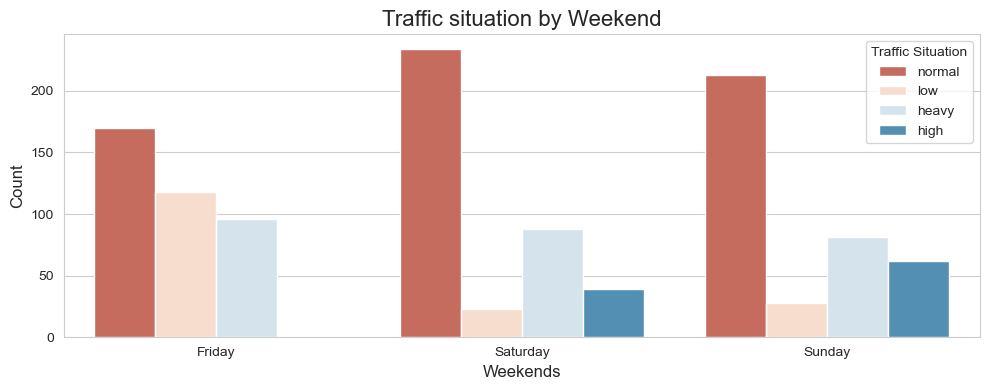

In [18]:
# Generate count plot using Seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(10, 4))
sns.countplot(data=weekend, x='Day of the week', hue='Traffic Situation', palette='RdBu')
plt.title('Traffic situation by Weekend', fontsize=16)
plt.xlabel('Weekends', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

A normal traffic flow is mostly experienced on weekends

**Next, we'll analyze the vehicle usage during these weekends and also analyze the distribution of this traffic across hours of the day to get more insight**

In [19]:
# Select columns of interest for vehicle analysis
selected_columns2 = weekend[['Day of the week', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount']]

# Grouping by 'Category' and summing the selected columns
weekendsum = selected_columns2.groupby('Day of the week').sum().reset_index()

weekendsum

,Day of the week,CarCount,BikeCount,BusCount,TruckCount
0,Friday,26478,8452,3154,3896
1,Saturday,26446,5624,6151,6265
2,Sunday,26070,5290,6175,6378


Car usage remains the same across the weekend, but on Fridays bike usage experiences over 50% increase as compared to other days, while this is the direct opposite for buses and trucks which experiences about 50% decrease in usage on Fridays as compared to other weekend days.

Let us also find out if there was a particular Friday that had this spike in bike usage, or if it is a regular occurence that happens every Friday.

 + **iii) Total bike traffic count for Fridays** 

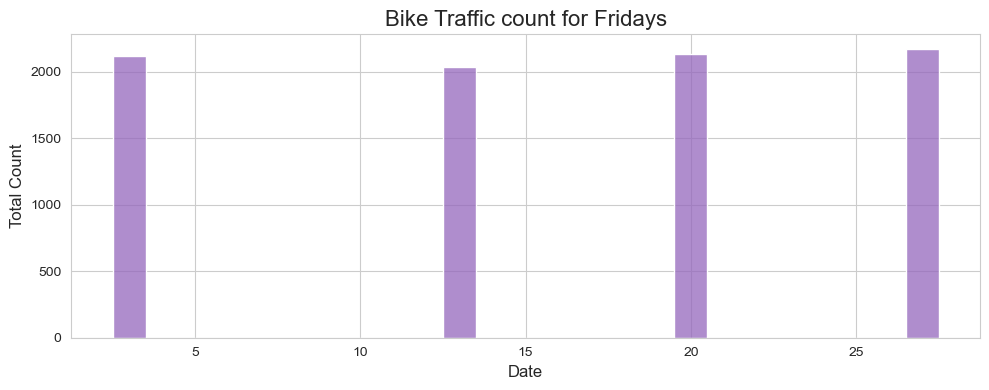

In [20]:
fridaybike = df[friday]
fridaybike1 = fridaybike[['Hour', 'BikeCount', 'Traffic Situation', 'Date']]

# Convert Hour to object datatype to enable count plot
fridaybike1['Date'] = fridaybike1['Date'].astype('category')

# Generate histogram plot using Seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(10, 4))
sns.histplot(data=fridaybike1, x='Date', weights='BikeCount', color='#9467bd')

plt.title('Bike Traffic count for Fridays', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.tight_layout()
plt.show()

Overall, this spike in bike usage seems to be a regular occurence on Fridays 

Going a step further, how is this traffic distributed across the hours of Fridays?

+ **iv) Friday Bike Traffic count by the Hour**

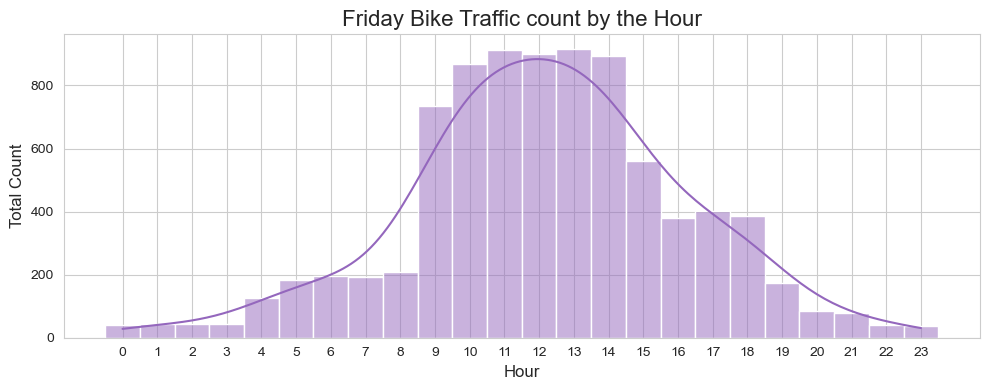

In [21]:
# Convert Hour to object datatype to enable count plot
fridaybike1['Hour'] = fridaybike1['Hour'].astype('category')

# Generate histogram plot using Seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(10, 4))
sns.histplot(data=fridaybike1, x='Hour', weights='BikeCount', bins=24, color='#9467bd', kde=True)

plt.title('Friday Bike Traffic count by the Hour', fontsize=16)
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

+ **v) Friday Bike Traffic Situation by the Hour**

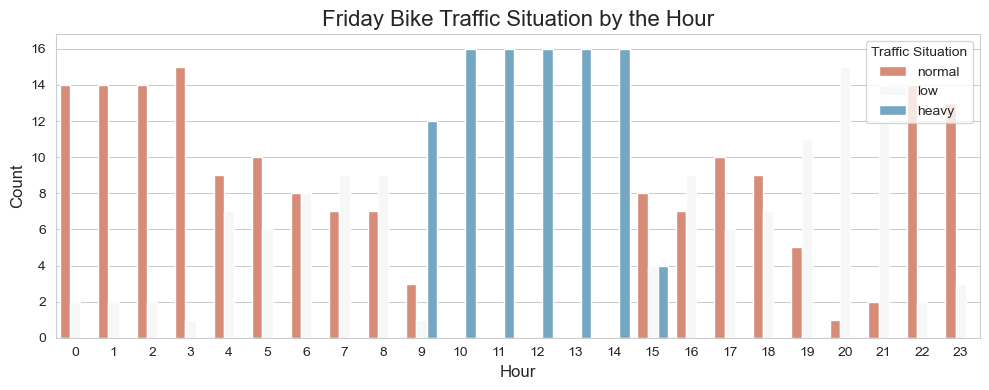

In [22]:
# Convert Hour to object datatype to enable count plot
fridaybike1['Hour'] = fridaybike1['Hour'].astype('category')

# Generate count plot using Seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(10, 4))
sns.countplot(data=fridaybike1, x='Hour', hue='Traffic Situation', palette='RdBu')
plt.title('Friday Bike Traffic Situation by the Hour', fontsize=16)
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

The plots above reveals that this increase in bike usage on Fridays tend to occur particularly between the hours of 9am to 2pm. Considering our scope/region of study (Kabul, Afghanistan), this could be due to some of the following reasons:

1. **Religious Observance:** In Islamic countries like Afghanistan, Friday is a holy day (Jumu'ah) for Muslims. The day includes a special congregational prayer, usually around midday, which is an important weekly event. People might use bikes to travel to mosques since biking is faster and more convenient.

2. **Reduced Traffic and Work Schedules:** Fridays are typically a day off or a half-day in many Muslim-majority countries. With reduced work hours and less traffic on the roads, more people may choose to cycle for errands, visiting friends or family, or leisure activities. Biking can be a more pleasant and efficient mode of transport during these quieter periods.

3. **Market and Shopping Activities:** Many people use Fridays for shopping and visiting local markets. Bicycles are often a preferred mode of transportation for navigating crowded streets and reaching markets in many Afghan cities and towns. This period, from mid-morning to early afternoon, is a common time for people to run errands.

4. **Community and Social Events:** Fridays may also see an increase in community gatherings or social events. Since Fridays are generally considered a weekend day, people may use bikes to travel to parks, recreational areas, or family gatherings.



**Conclusively:**

1. Generally, peak hours of traffic exists 6am-8am and 4pm-6pm, especially for weekdays

2. Cars have the most vehicle usage
3. All vehichle types follow the same peak hour range of 6-8am and 4-6pm, except for trucks which experience its first peak between 10pm-3am, and its second between 9am-1pm. 
4. The busiest days of the week are Tuesdays, Wednesdays, and Thursdays, while Mondays, and the weekends (Fridays, Saturdays, and Sundays) seem to share a much reduced traffic count.
5. Modays experience the least traffic volume compared toother weekdays
6. Car usage remains fairly the same across the weekend, but on Fridays bike usage experiences over 50% increase as compared to other days, while this is the direct opposite for buses and trucks which experiences about 50% decrease in usage on Fridays as compared to other weekend days.
7. The increase in bike usage on Fridays tend to occur particularly between the hours of 9am to 2pm.